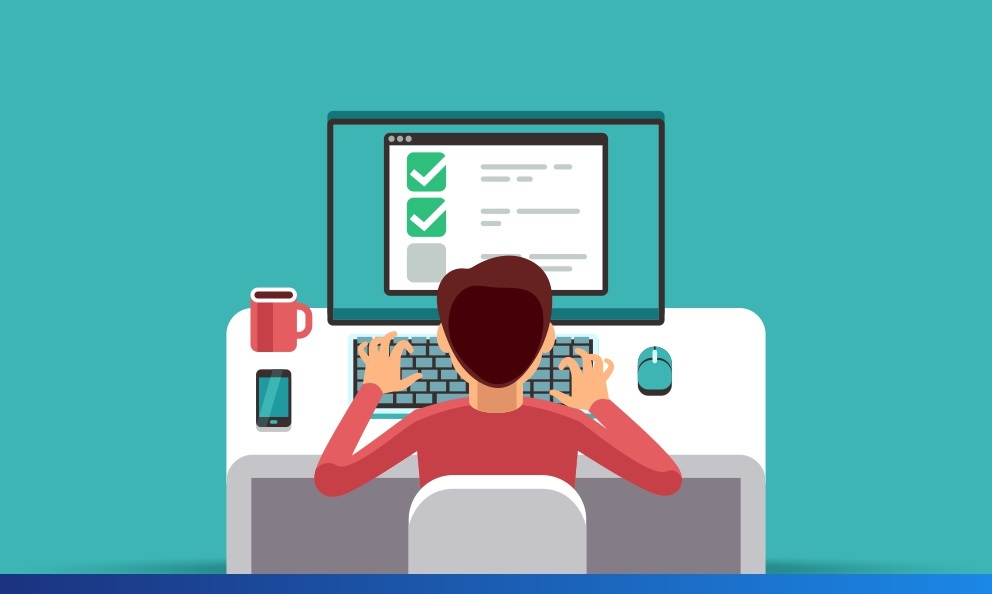
# Who are we?
Hello Kaggle Users! Hello Experts and Beginners! Hello everyone! 

We all use this platform to write better codes and analyze data. But, I think it is **NOT** enough! We live in the same world, however we do not know about different cultures, economic situations or similarity with people who are from across the world. 

It is time to know more about your colleague, your coder friend or other users who is commenting for your notebook. Now, we will see under what conditions your friend wrote her/his code or preferred programming language and more.

Let's review the content of this notebook below:

<font color = 'red'>
    
1.  [Import Libraries](#1)
    
1.  [Load and Check Data](#2)
    
1.  [Simplify and Organise Data](#3)  
    
1.  [Visualization](#4)
    
    [Pie Charts: Distribution of Age, Gender and Coding Years](#5)
    
    [Subplots: Bar and Pie Charts for Counting Users by Countries and Continents](#6)
    
    [Box Plot: Annual Average Compensation via Countries](#7)
    
    .
    
    .
    
    .
    
    ...It's still in process! :)
    


<font color = 'green'> 
    
    
    
 Me and my team just started this adventure. Please, support us with your UPVOTES. Thank you all!  
    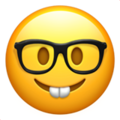

<a id ="1"></a><br>
## Import Libraries 

Firstly, libraries need to be imported for using next examinations. 

* <font color = 'red'> matplotlib.pyplot: <font color = 'black'> This library provides basic charts to visualize data.
* <font color = 'red'> plotly: <font color = 'black'> This library provides interactive charts to visualize data and you can see more info when you are on these types of charts.
* <font color = 'red'> numpy: <font color = 'black'> This library is for scientific computing.
* <font color = 'red'> pandas: <font color = 'black'> This library is a fast, powerful, flexible and easy to use open source data analysis.
* <font color = 'red'> seaborn: <font color = 'black'> This library is data visualization library based on matplotlib. It provides a high-level interface for informative statistical graphics.   
    

In [ ]:
import matplotlib.pyplot as plt # to plot

import plotly.graph_objs as go # for interactive plots
from plotly import tools
from plotly.offline import iplot
from plotly.subplots import make_subplots

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



<a id ="2"></a><br>
## Load and Check Data

Secondly, data need to be read in order to analyze it.

In [ ]:
data = pd.read_csv("../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv") # reading data

In [ ]:
data.head() # showing data's first 5 rows 

<a id ="3"></a><br>
## Simplify and Organise Data

**Simplification** and **organization** data are very helpful to focus on spesific subjects. Thanks to this, you can:

* Get rid of missing values and data you won't use.
* Change long names in columns or rows which are effecting your charts in bad way.
* Add new columns or rows which are convenient with data.
* Change data type of colums.

Are these all? Of course not! You have many option to make data better for your work.

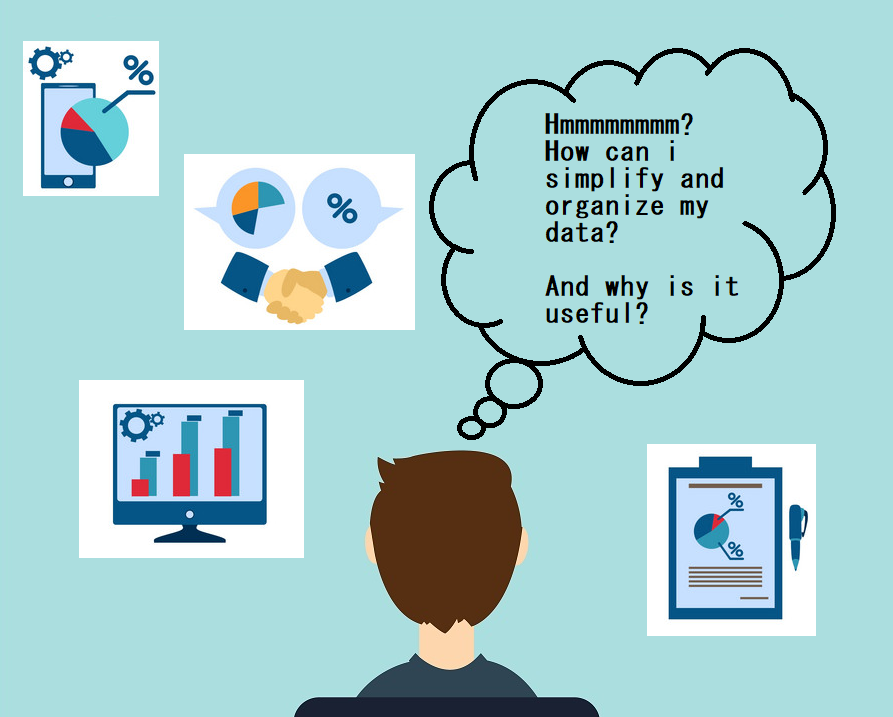

In [ ]:
newData = {"Duration" : data["Time from Start to Finish (seconds)"], "Age" : data.Q1, "Gender" : data.Q2, "Country" : data.Q3, "Education Level" : data.Q4, "Job" : data.Q5, "Coding for Years" : data.Q6, "Which Program Do You Use?" : data.Q7_Part_1, "Annual Compensation" : data.Q24}

newDF = pd.DataFrame(data = newData) # making new smaller data set which i'll use
newDF = newDF.drop([0], axis = 0) # dropping first row which is include questions

newDF["Duration"] = newDF["Duration"].astype(int) # changing data type of duration
newDF["Duration"] = newDF["Duration"]/3600 # convertimg seconds to hours

#newDF["Annual Compensation"] = newDF["Annual Compensation"].astype(int) 

# changing long names in country column
countryNameChange = {"United States of America": "USA", 
                     "United Kingdom of Great Britain and Northern Ireland": "UK",
                     "Iran, Islamic Republic of...": "Iran",
                     "United Arab Emirates" : "UAE",
                     "Republic of Korea" : "North Korea" 
                    }
newDF["Country"] = newDF["Country"].replace(countryNameChange)



In [ ]:
# changing data type of compensation and taking average value of it 
avgComp = []
for i in newDF["Annual Compensation"]:
    if i == "100,000-124,999":
        avgComp.append(112500)
    elif i == "15,000-19,999":
        avgComp.append(17500)
    elif i == "125,000-149,999":
        avgComp.append(137500)
    elif i == "70,000-79,999":
        avgComp.append(75000)
    elif i == "30,000-39,999":
        avgComp.append(35500)
    elif i == "90,000-99,999":
        avgComp.append(95000)
    elif i == "1,000-1,999":
        avgComp.append(1500)
    elif i == "$0-999":
        avgComp.append(500)
    elif i == "10,000-14,999":
        avgComp.append(12500)
    elif i == "150,000-199,999":
        avgComp.append(175000)
    elif i == "60,000-69,999":
        avgComp.append(65000)
    elif i == "4,000-4,999":
        avgComp.append(4500)
    elif i == "> $500,000":
        avgComp.append(500000)
    elif i == "300,000-500,":
        avgComp.append(400000)
    elif i == "40,000-49,999":
        avgComp.append(45000)
    elif i == "25,000-29,999":
        avgComp.append(27500)
    elif i == "80,000-89,999":
        avgComp.append(85000)
    elif i == "7,500-9,999":
        avgComp.append(8750)
    elif i == "50,000-59,999":
        avgComp.append(55000)
    elif i == "250,000-299,999":
        avgComp.append(275000)
    elif i == "5,000-7,499":
        avgComp.append(6750)
    elif i == "2,000-2,999":
        avgComp.append(2500)
    elif i == "20,000-24,999":
        avgComp.append(22500)
    elif i == "200,000-249,999":
        avgComp.append(225000)
    elif i == "3,000-3,999":
        avgComp.append(3500)
    else: 
        avgComp.append(0)

# updating "Average Compensation" column
newDF["Average Compensation"] = avgComp
newDF["Average Compensation"].astype(int)

In [ ]:
# preparing to add new continent column
contList = []

for i in newDF["Country"]:
    if i == "Colombia":
        contList.append("South America")
    elif i == "USA":
        contList.append("North America")
    elif i == "Argentina":
        contList.append("South America")
    elif i == "Japan":
        contList.append("Asia")
    elif i == "India":
        contList.append("Asia")
    elif i == "Brazil":
        contList.append("South America")
    elif i == "China":
        contList.append("Asia")
    elif i == "Germany":
        contList.append("Europe")
    elif i == "Indonesia":
        contList.append("Asia")
    elif i == "Canada":
        contList.append("North America")
    elif i == "Switzerland":
        contList.append("Europe")
    elif i == "Singapore":
        contList.append("Asia")
    elif i == "Russia":
        contList.append("Europe")
    elif i == "South Africa":
        contList.append("Africa")
    elif i == "Egypt":
        contList.append("Africa")
    elif i == "Netherlands":
        contList.append("Europe")
    elif i == "Pakistan":
        contList.append("Asia")
    elif i == "Nepal":
        contList.append("Asia")
    elif i == "South Korea":
        contList.append("Asia")
    elif i == "Poland":
        contList.append("Europe")
    elif i == "Belarus":
        contList.append("Europe")
    elif i == "Tunisia":
        contList.append("Africa")
    elif i == "Ukraine":
        contList.append("Europe")
    elif i == "Belgium":
        contList.append("Europe")
    elif i == "Saudi Arabia":
        contList.append("Asia")
    elif i == "Taiwan":
        contList.append("Asia")
    elif i == "Nigeria":
        contList.append("Africa")
    elif i == "Italy":
        contList.append("Europe")
    elif i == "Spain":
        contList.append("Europe")
    elif i == "UAE":
        contList.append("Asia")
    elif i == "Mexico":
        contList.append("North America")
    elif i == "Viet Nam":
        contList.append("Asia")
    elif i == "Thailand":
        contList.append("Asia")
    elif i == "UK":
        contList.append("Europe")
    elif i == "France":
        contList.append("Europe")
    elif i == "Ghana":
        contList.append("Africa")
    elif i == "Ireland":
        contList.append("Europe")
    elif i == "Philippines":
        contList.append("Asia")
    elif i == "Morocco":
        contList.append("Africa")
    elif i == "Turkey":
        contList.append("Europe")
    elif i == "Iran":
        contList.append("Asia")
    elif i == "Peru":
        contList.append("South America")
    elif i == "Romania":
        contList.append("Europe")
    elif i == "Republic of Korea":
        contList.append("Asia")
    elif i == "Australia":
        contList.append("Australia")
    elif i == "Chile":
        contList.append("South America")
    elif i == "Kenya":
        contList.append("Africa")
    elif i == "Sweden":
        contList.append("Europe")
    elif i == "Bangladesh":
        contList.append("Asia")
    elif i == "Greece":
        contList.append("Europe")
    elif i == "Malaysia":
        contList.append("Asia")
    elif i == "Portugal":
        contList.append("Europe")
    elif i == "Israel":
        contList.append("Asia")
    elif i == "Sri Lanka":
        contList.append("Asia")
    else:
        contList.append("-")

# adding new column ("Continet") to data
newDF["Continent"] = contList
newDF.head()

<a id ="4"></a><br>
## Visualization

**Visualization** is one of the most important part to understand about data more. With visualization, you can:

* See relationships between features.
* Realise new things which could not see before while looking tables.
* Set up your machine learning model with this part.
* Make your notebook more fun :)
* Categorize and manipulate data however you want for visualizing.

After doing this, you can:

* Deduce.
* Fit your machine learning algorithm.

And more!

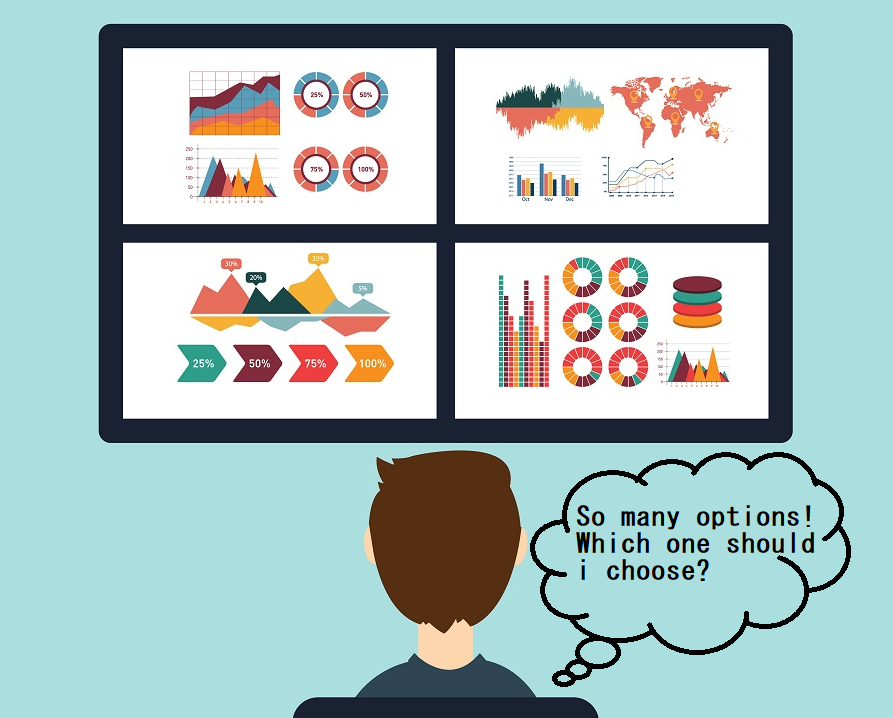

<a id ="5"></a><br>
### Pie Charts: Distribution of Age, Gender and Coding Years

In this section, there are three **pie charts** to visualize distribution of age, gender and coding years features. With this chart, it can be observed where and what is **intense** or **sparse**.

In [ ]:
list1 = newDF["Age"].unique()
# sorting values equivalently with value counts output sort
uniqueSorting = [list1[3], list1[2], list1[4], list1[1], list1[0], list1[7], list1[9], list1[6], list1[5], list1[8], list1[10]]

list2 = newDF["Gender"].unique()
# sorting values equivalently with value counts output sort
uniqueSorting2 = [list2[0], list2[1], list2[3], list2[2], list2[4]]

list3 = newDF["Coding for Years"].unique()
# sorting values equivalently with value counts output sort
uniqueSorting3 = [list3[2], list3[4], list3[3], list3[0], list3[1], list3[5], list3[6]]

In [ ]:
pie1 = newDF["Age"].value_counts()
labels1 = uniqueSorting

pie2 = newDF["Gender"].value_counts()
labels2 = uniqueSorting2

pie3 = newDF["Coding for Years"].value_counts()
labels3 = uniqueSorting3

fig = make_subplots(
    rows = 1, cols = 3,
    column_widths = [1, 1, 1],
    row_heights = [2],
    specs = [[{"type" : "pie"}, {"type" : "pie"}, {"type" : "pie"}]]
)

fig.add_trace(
    go.Pie(values = pie1, labels = labels1, name = "Age Dist."),
    row = 1, col = 2
)      
    
fig.add_trace(
    go.Pie(values = pie2, labels = labels2, name = "Gender Dist."),
    row = 1, col = 1
)      

fig.add_trace(
    go.Pie(values = pie3, labels = labels3, name = "Year Dist."),
    row = 1, col = 3
)      

fig.update_layout(
    title={
        'text': "Distribution of Age, Gender and Coding Years",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
        })
fig.update(layout_showlegend = False)
fig.update_layout(
    template = "plotly_dark"
)
          
fig.show()

The results that can be obtained from the above charts are as follows:

* The majority of Kaggle users are men. So, it can be said that if somebody will join Kaggle, that person is very likely to be a man. 
* There is no group that constitutes the majority in the age distribution. However, it can be said that the majority of the distribution consists of 18-29 year old users.
* The same thing can be said about the age distribution for this chart. There is no the majority group. In addition, It can be observed that the number of users who have been dealing with coding for **1-2 years** and users who have been dealing with coding for **3-5 years** is very close to each other. Also, It is seen that the number of users who have been dealing with coding for **1 year or less** is also significantly higher.

<a id ="6"></a><br>
### Subplots: Bar and Pie Charts for Counting Users by Countries and Continents

In this section, users were categorized according to where they are from and according to which continent their country belongs. Bar chart and pie chart were used to show distribution.

In [ ]:

fig = make_subplots(
    rows = 1, cols = 2,
    column_widths = [0.5,0.25],
    row_heights = [0.5],
    specs=[[{"type": "bar"}, {"type": "pie"}]])

fig.add_trace(
    go.Bar(x = newDF["Country"].value_counts()[:20].index, y = newDF["Country"].value_counts()[:20].values
, marker = dict(color="crimson"), showlegend = False),
    row = 1, col = 1
)

fig.add_trace(
    go.Pie(values = newDF["Continent"].value_counts().values, labels = newDF["Continent"].value_counts().index, name = "Continents in Kaggle"),
    row = 1, col = 2
)      

fig.update_xaxes(tickangle = 90)

fig.update_layout(
    xaxis = dict(
        title='Countries',
        titlefont_size=16,
        tickfont_size=14,
    ),
    yaxis = dict(
        title='Number of Users',
        titlefont_size=16,
        tickfont_size=14,
    )
)
fig.update_layout(
    template = "plotly_dark",
    margin = dict(r = 10, t = 25, b = 80, l = 60),
    #margin = dict(r = 0, t = 0, b = 80, l = 50),
    annotations=[
        dict(
            visible = False,
            showarrow = False,
            xref = "paper",
            yref = "paper",
            x = 0,
            y = 0)
    ]
)
fig.update_layout(
    updatemenus=[
        dict(
            type = "buttons",
            direction = "right",
            x = 0.55,
            y = 1.2,
            showactive = True,
            bgcolor = '#EBEBEB',
            bordercolor = '#C20000',
            font = dict(size=11, color='#000000'),
            buttons = list(
                [
                    dict(
                        label = "Top 20",
                        method = "update",
                        args = [{"x": [newDF["Country"].value_counts()[:20].index],"y": [newDF["Country"].value_counts()[:20].values]}],
                    ),
                    dict(
                        label = "Asia",
                        method = "update",
                        args = [{"x": [newDF.Country[newDF['Continent'] == 'Asia'].value_counts().index],"y": [newDF.Country[newDF['Continent'] == 'Asia'].value_counts().values]}],
                        visible = True,
                    ),
                    dict(
                        label = "Africa",
                        method = "update",
                        args = [{"x": [newDF.Country[newDF['Continent'] == 'Africa'].value_counts().index],"y": [newDF.Country[newDF['Continent'] == 'Africa'].value_counts().values]}],
                    ),
                    dict(
                        label = "Europe",
                        method = "update",
                        args = [{"x": [newDF.Country[newDF['Continent'] == 'Europe'].value_counts().index],"y": [newDF.Country[newDF['Continent'] == 'Europe'].value_counts().values]}],
                    ),
                    dict(
                        label = "North America",
                        method = "update",
                        args = [{"x": [newDF.Country[newDF['Continent'] == 'North America'].value_counts().index],"y": [newDF.Country[newDF['Continent'] == 'North America'].value_counts().values]}],
                    ),
                    dict(
                        label = "South America",
                        method = "update",
                        args = [{"x": [newDF.Country[newDF['Continent'] == 'South America'].value_counts().index],"y": [newDF.Country[newDF['Continent'] == 'South America'].value_counts().values]}],
                    ),
                    
                ]
            ),
        )
    ]
)
fig.show()

The results that can be obtained from the interactive bar chart above are as follows:

* <font color = 'red'> Top 20: <font color = 'black'> Although the majority of the countries in the first twenty are **Asian** and **European** countries. But, the number of **USA** users is almost higher than the number of users in **European** countries. Also, **India** is the country that dominates this group by far.
* <font color = 'red'> Asia: <font color = 'black'> There are 19 countries included in the **Asia**n continent. **India** takes the lead among these countries. Then, it can be said that **Japan** and **China** have user density compared to other countries.
* <font color = 'red'> Africa: <font color = 'black'> There are 7 countries included in the **African** continent. **Nigeria** is the country with the highest number of users among these countries. The number of users in the following 4 countries is very close to each other.
* <font color = 'red'> Europe: <font color = 'black'> There are 18 countries included in the **European** continent. The number of users ranges from 54 **(Ireland)** to 582 **(Russia)**. There is a certain difference in the number of users of the first three countries. However, the user numbers of the following 3 countries are very close to each other.
* <font color = 'red'> North America: <font color = 'black'> Three countries with a far higher number of users in the **USA** are included in this continent.
* <font color = 'red'> South America: <font color = 'black'> There are 5 countries including the **South America** continent. **Brazil** is the country with the most users. However, the user numbers of **Peru** and **Chile** are very similar.     
    
Other results that can be obtained from the pie chart above are as follows:
* It can be seen that users in **Asia** have far superiority compared to other continents. After examining the bar chart, we can also say that **India** is the country with the greatest contribution to this superiority.
* There is no country that dominates as the majority in the **European** continent, which follows the **Asia** continent.
* The **North America** continent is the 3rd with the highest rate in the pie chart. However, in this continent, the **USA** has a tremendous advantage over other countries.    

<a id ="7"></a><br>
### Box Chart: Annual Average Compensation via Countries

The box chart is a very useful chart used for analyzing statistical data. In this section, countries' average annual compensation fees are shown in the chart. The following data can be seen in the chart:
* q1 
* q3 
* Median 
* Upper fence 
* Max 


In [ ]:
fig = go.Figure()

fig.add_trace(go.Box(
    x = newDF["Country"],
    y = newDF["Average Compensation"],
    
    marker = dict(
        color = 'rgb(220, 20, 60)',
    )
)
)

fig.update_layout(
    template = "plotly_dark",
    autosize=False,
    width=1000,
    height=500,
)    

fig.update_layout(
    title={
        'text': 'Box Plot of Annual Average Compensation via Countries',
        'y':0.9,
        'x':0.475,
        'xanchor': 'center',
        'yanchor': 'top'
        })

fig.show()


* The chart above is suitable for understanding the income levels of countries. 
* It can be predicted which countries have high income levels even by looking out of the corner of your eye. For example: USA, Switzerland, Australia, Israel...
* All countires have outliers which is out of average.
* Almost half of the countries have high average compensatitons fee as $500000.
* Countries that exceed some values can be divided into classes by putting limits on demand.


## References

* https://seaborn.pydata.org/
* https://pandas.pydata.org/
* https://plotly.com/python/
* https://numpy.org/
* https://matplotlib.org/
* https://www.google.com/imghp?hl=tr&tab=wi&ogbl
